In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Reading the image 
image_path = "D:\Data Science\Projects\E-KYC Using Computer Vision\Image\me.png"
image = cv2.imread(image_path)
image

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [4]:
type(image)

numpy.ndarray

In [5]:
image.shape

(3515, 3412, 3)

In [6]:
# it will create a new window to show image 
# cv2.imshow("Image Display", image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

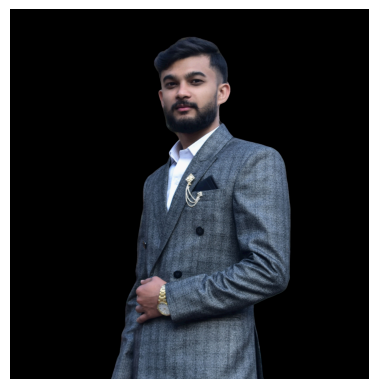

In [7]:
# Convert image to BGR555
bgr555_img = cv2.cvtColor(image, cv2.COLOR_BGR2BGR555)

# Convert back to BGR
bgr_img = cv2.cvtColor(bgr555_img, cv2.COLOR_BGR5552BGR)

# Convert BGR to RGB for displaying
rgb_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(rgb_img)
plt.axis('off')
plt.show()


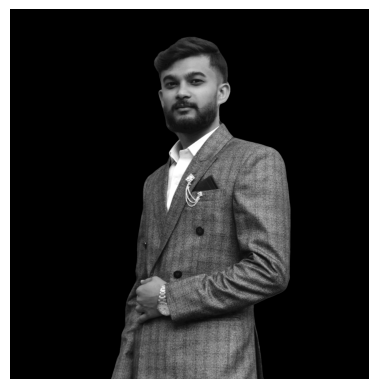

In [8]:
# converting image to gray_scale 
gray_image = cv2.cvtColor(rgb_img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')
plt.axis('off')
plt.show()

# Splitting and Merging of channel

In [9]:


print(image.shape)



(3515, 3412, 3)


In [10]:
# printing the top left pixel 
print("Top Left", image[0,0])



# printing the top right pixel
print("Top Right", image[0,500])

# similarly we can print bottom left and bottom right 

Top Left [0 0 0]
Top Right [0 0 0]


In [11]:
# Splitting each and every channels

# showing individual color channels of the image 
blue = image[:,:, 0]
green = image[:, :, 1]
red = image[:, :, 2]

# print(blue)

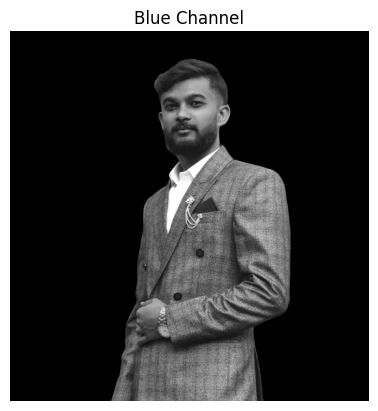

In [12]:
# Display the blue channel using matplotlib
plt.imshow(blue, cmap='gray')
plt.title("Blue Channel")
plt.axis('off')
plt.show()

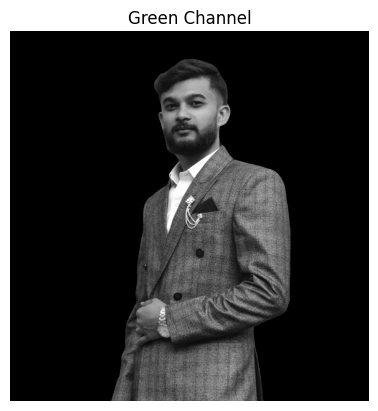

In [13]:
# Display the green channel using matplotlib
plt.imshow(green, cmap='gray')
plt.title("Green Channel")
plt.axis('off')
plt.show()

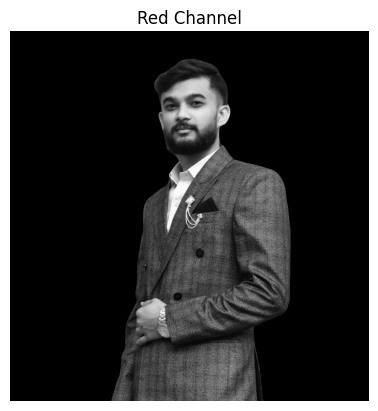

In [14]:
# Display the red channel using matplotlib
plt.imshow(red, cmap='gray')
plt.title("Red Channel")
plt.axis('off')
plt.show()

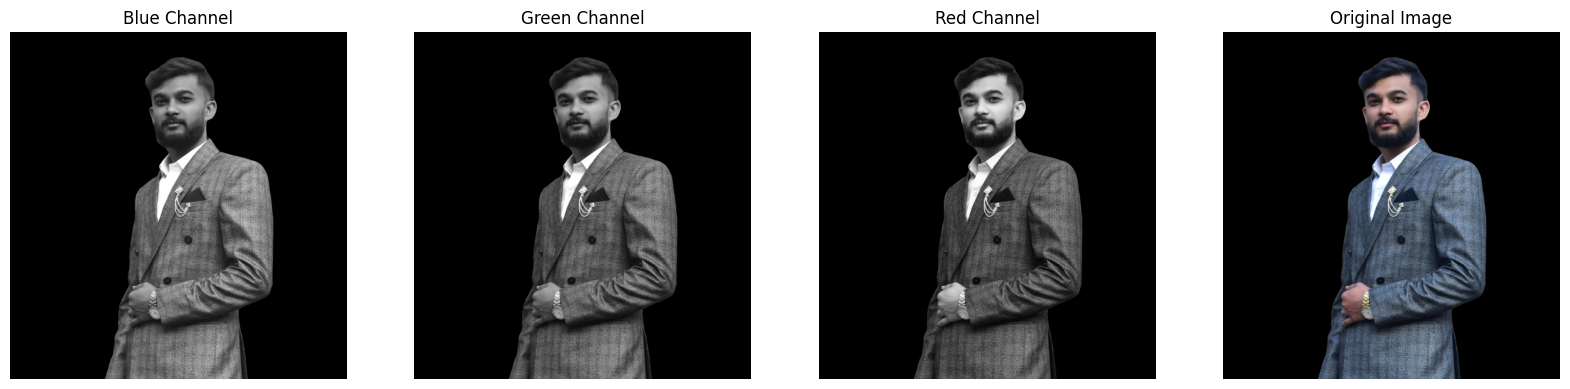

In [15]:
# Split the image into its blue, green, and red channels
b, g, r = cv2.split(image)

# Convert the channels back to the original format
# OpenCV uses BGR format but Matplotlib uses RGB format, so we need to swap the channels for the original image
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the images using Matplotlib
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

axes[0].imshow(b, cmap='gray')
axes[0].set_title("Blue Channel")
axes[0].axis('off')

axes[1].imshow(g, cmap='gray')
axes[1].set_title("Green Channel")
axes[1].axis('off')

axes[2].imshow(r, cmap='gray')
axes[2].set_title("Red Channel")
axes[2].axis('off')

axes[3].imshow(image_rgb)
axes[3].set_title("Original Image")
axes[3].axis('off')

plt.show()

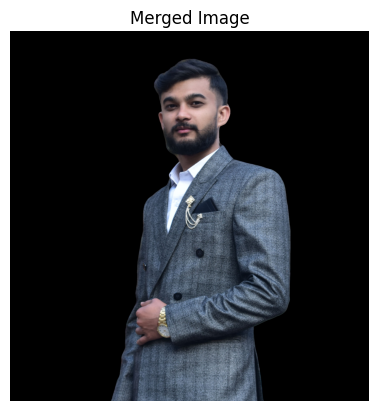

In [16]:


# Merge the channels back into an image
img_merged = cv2.merge((b, g, r))

# Convert the original image and merged image to RGB format for Matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
img_merged_rgb = cv2.cvtColor(img_merged, cv2.COLOR_BGR2RGB)

# Display the merged image using Matplotlib
plt.imshow(img_merged_rgb)
plt.title("Merged Image")
plt.axis('off')  # Hide the axis
plt.show()

## Performing Mean Blur 

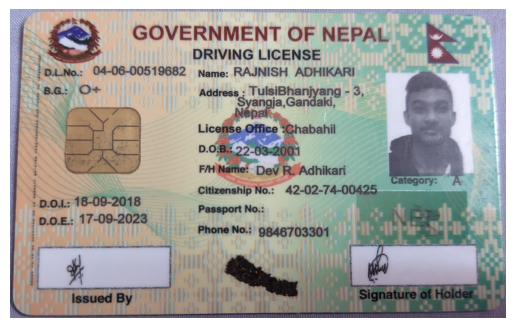

In [17]:
img = cv2.imread("D:\Data Science\Projects\E-KYC Using Computer Vision\Image\liscence.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure()
plt.imshow(img)
plt.axis('off')
plt.show()

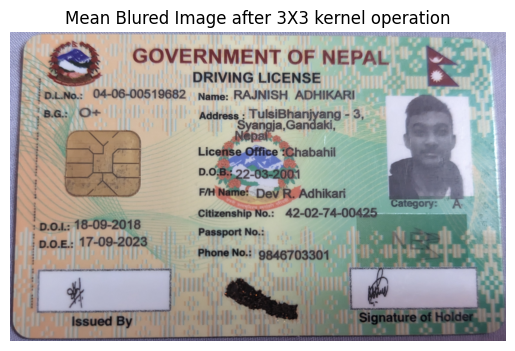

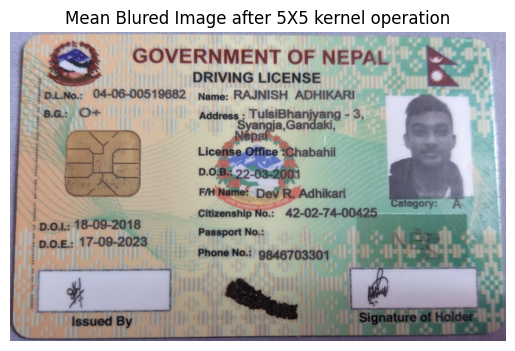

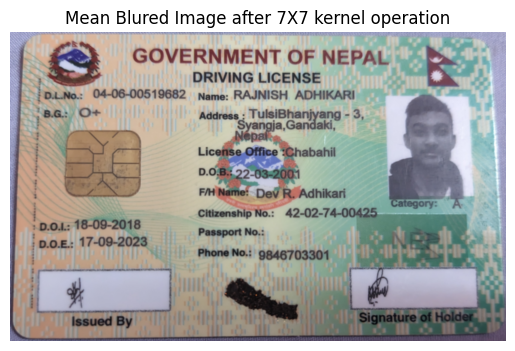

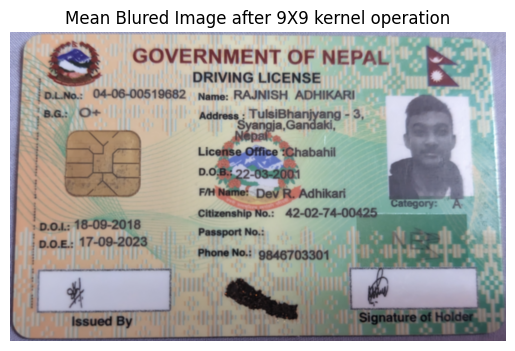

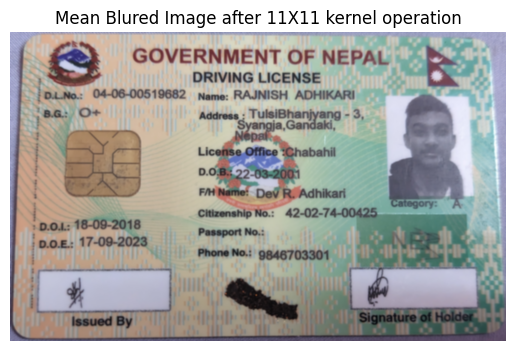

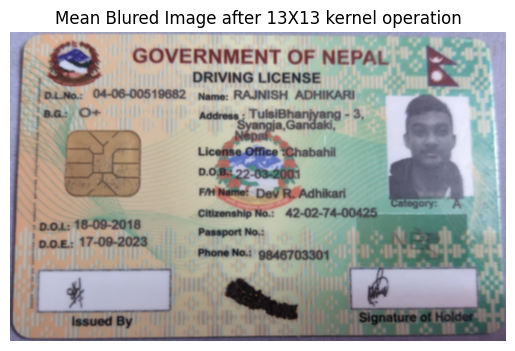

In [18]:
# creating mean filter kernel
def meankernel(size):
    mk = np.ones((size, size), dtype = np.float32)/(size**2)
    return mk

# performing mean blur
for size in range(3, 14, 2):
    blur_img = cv2.filter2D(img , -1, meankernel(size))
    plt.figure()
    plt.imshow(blur_img)
    plt.title(f"Mean Blured Image after {size}X{size} kernel operation")
    plt.axis('off')
    plt.show()

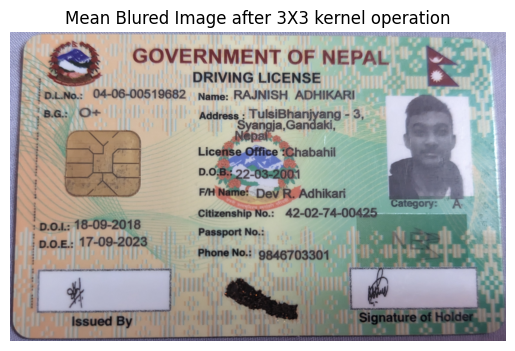

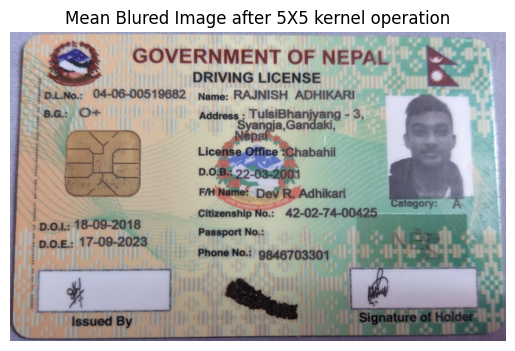

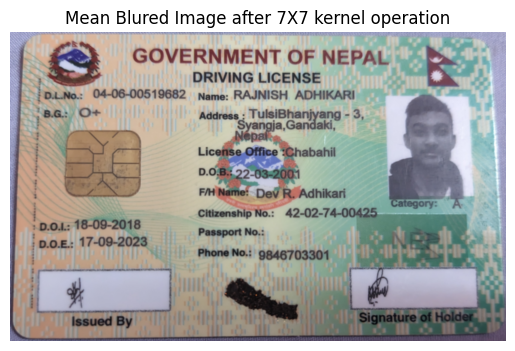

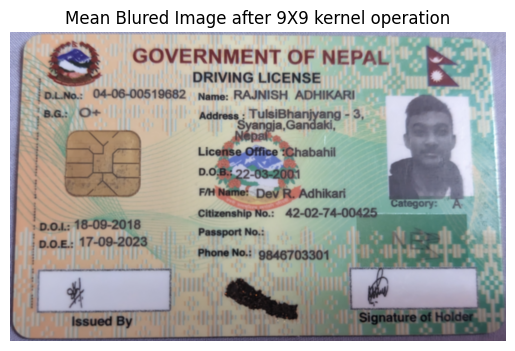

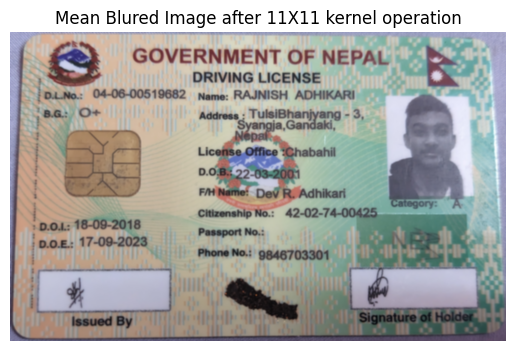

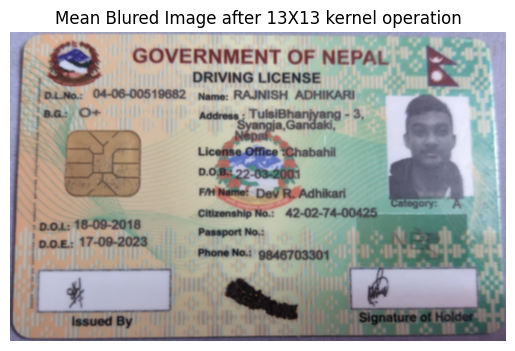

In [19]:
# Mean blurring using cv2 operation 
for size in range(3,14,2):
    blur_img = cv2.blur(img, (size, size))
    plt.figure()
    plt.imshow(blur_img)

    
    plt.title(f"Mean Blured Image after {size}X{size} kernel operation")
    plt.axis('off')
    plt.show()

# Gaussian Blur 

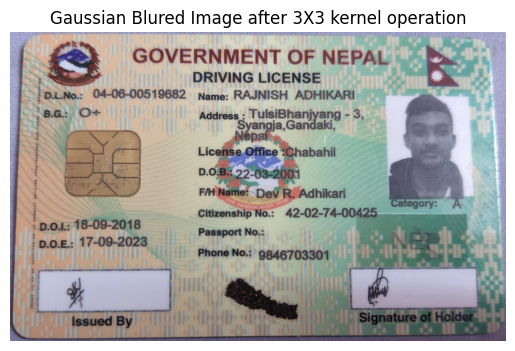

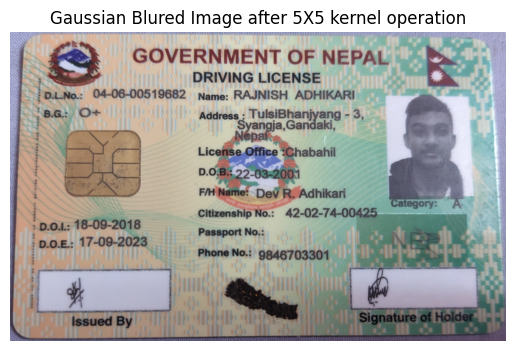

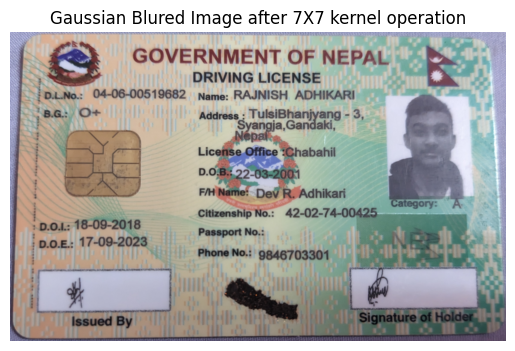

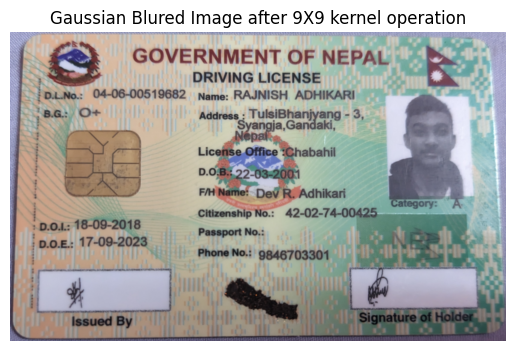

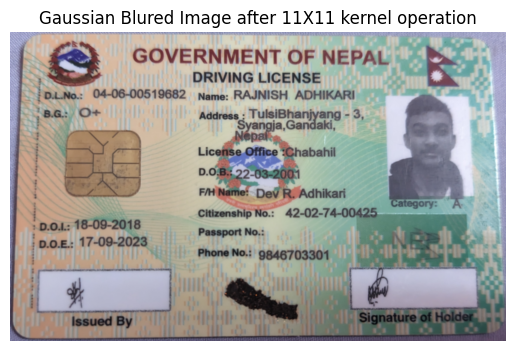

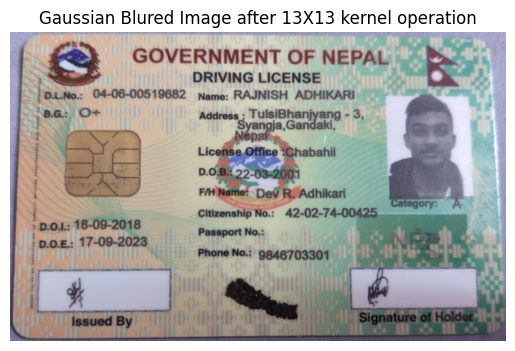

In [21]:
for size in range(3, 14, 2):
    blur_img = cv2.GaussianBlur(img, (size, size), 0)
    plt.figure()
    plt.imshow(blur_img)
    plt.title(f"Gaussian Blured Image after {size}X{size} kernel operation")
    plt.axis('off')
    plt.show()

In [22]:
# Histogram Implementation 
# It's basically the plot of pixel intensity with frequency 
# In x-axis of histogram, we are taking all the pixel intensity from 0 to 255 and in y-axis we are taking the
# frequency 

img = cv2.imread("D:\Data Science\Projects\E-KYC Using Computer Vision\Image\me.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure()
plt.imshow(img)
plt.axis('off')
plt.show()